# Pymaceuticals Inc.
---

Analysis :In this study, 249 mice who were identified with SCC tumors received treatment with a range of drug regimens.

These four treatments, namely 'Capomulin,' 'Ramicane,' 'Infubinol,' and 'Ceftamin,' are the top-performing options.
Out of 249 mice, 230 were treated with 'Capomulin,' demonstrating that it is the most commonly used treatment in the study.


The positive sign of the correlation coefficient (+0.84) indicates that as one variable (mouse weight) increases,
the other variable (average observed tumor volume) tends to increase as well.
In other words, heavier mice tend to have larger average tumor volumes when subjected to the Capomulin regimen.

In [87]:
#import Dependencies 
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Load data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read both data files (the mouse data and the study results)
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Merge both data set into a single DataFrame
complete_data = pd.merge(study_results,mouse_metadata,on = 'Mouse ID',how = 'left')
# Display the complete dataframe and it's shape
print(complete_data.shape)
complete_data.head()

(1893, 8)


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [49]:
# Checking the number of unique mice IDs
unique_mice_number = complete_data['Mouse ID'].unique().size
unique_mice_number

249

In [50]:
# Retrieve the mice by ID number that appear for both Mouse ID and Timepoint
duplicates_mouseId_tp = complete_data[complete_data.duplicated(subset=['Mouse ID', 'Timepoint'])]
duplicate_mouseIds = duplicates_mouseId_tp['Mouse ID'].unique()
duplicate_mouseIds

array(['g989'], dtype=object)

In [51]:
# Retrieve all the data for duplicate mouse ID. 
bad_miceRow_series = complete_data['Mouse ID'].isin(duplicate_mouseIds)
duplicate_mousId_data = complete_data[bad_miceRow_series]
duplicate_mousId_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [52]:
# dropping the duplicate mouse by its ID to get a clean DataFrame.
clean_df = complete_data[~bad_miceRow_series]
print(clean_df.shape)
clean_df.head()

(1880, 8)


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [53]:
# Checking the number of mice in the clean DataFrame.
clean_df['Mouse ID'].unique().size

248

## Summary Statistics

In [30]:
# Group the DataFrame by 'Drug_Regimen'
grouped = clean_df.groupby('Drug Regimen')

#Calculating statistics of grouped data 
mean  = grouped["Tumor Volume (mm3)"].mean()
median = grouped["Tumor Volume (mm3)"].median()
variance = grouped["Tumor Volume (mm3)"].var()
std_dev = grouped["Tumor Volume (mm3)"].std()
std_err = grouped["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary DataFrame.
summary_statistics_df = pd.DataFrame({'Mean Tumor Volume':mean,'Median Tumor Volume':median,'Tumor Volume Variance':variance,'Tumor Volume Std. Dev.':std_dev,'Tumor Volume Std. Err.':std_err})
summary_statistics_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [54]:
# Using the aggregation method to produce the same summary statistics.

summary_statistics = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean','median','var','std','sem'])
summary_statistics

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<Axes: xlabel='Drug Regimen', ylabel='# of Observed Mouse Timepoints'>

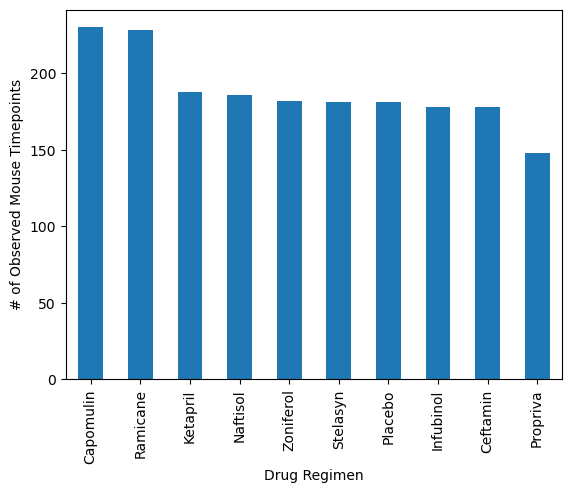

In [55]:
#Bar plot using Pandas (showing the total number of rows (Mouse ID/Timepoints) for each drug regimen)
# Group by 'Drug Regimen' and count the number of rows in each group
regimen_counts = clean_df['Drug Regimen'].value_counts()
#Generate Plot
regimen_counts.plot.bar(ylabel = '# of Observed Mouse Timepoints')

Text(0, 0.5, '# of Observed Mouse Timepoints')

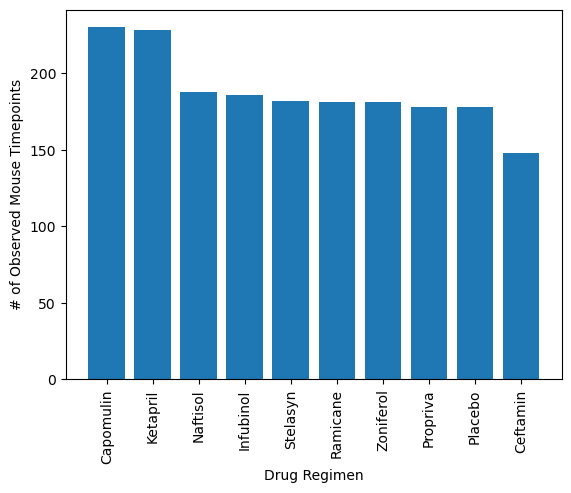

In [56]:
#Bar plot using Pyplot (showing the total number of rows (Mouse ID/Timepoints) for each drug regimen)
# Set x axis and tick locations
unique_drug_reg = clean_df['Drug Regimen'].unique() 
x_axis = np.arange(len(unique_drug_reg))
tick_locations = [value for value in x_axis]
#set y axis
count = clean_df['Drug Regimen'].value_counts().reset_index()
y_axis = count['count']
#plot bar chart 
plt.bar(x_axis,y_axis)
plt.xticks(tick_locations, unique_drug_reg, rotation="vertical")
#Set labels
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")


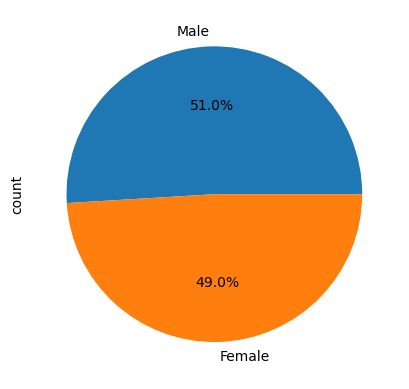

In [57]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
# gender_distribution = clean_df['Sex'].value_counts().reset_index()
# pie_chart_pd = gender_distribution.plot(kind="pie", y='Sex',autopct='%1.1f%%')
gender_distribution = clean_df['Sex'].value_counts()
pie_chart_pd = gender_distribution.plot(kind="pie", y='Sex',autopct='%1.1f%%')

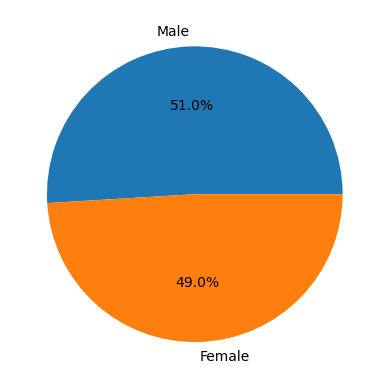

In [58]:
# Pie plot showing the distribution of female Vs male mice using pyplot
gender_distribution = clean_df['Sex'].value_counts().reset_index()
#create y label
y = [gender_distribution['count'][0],gender_distribution['count'][1]]
#Show Pie Plot
plt.pie(y,autopct='%1.1f%%',labels=['Male','Female'])
plt.show()

## Quartiles, Outliers and Boxplots

In [59]:
#Get max timepoint for each mouse
max_timepoint_perMouse = clean_df.groupby('Mouse ID')['Timepoint'].max().reset_index()

#Merge "max_timepoint_perMouse" dataframe with the original DataFrame
#Get tumor volume at the last timepoint
max_Timepoint_df = max_timepoint_perMouse.merge(clean_df, on=['Mouse ID','Timepoint'],how='left')
max_Timepoint_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [60]:
# A list of treatment names and an empty list to store tumor volume
treatment_names = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']
tumor_volume_data = []
#Loop through each drug to get final tumor volumes
for treatment in treatment_names:
    final_tumor_volume = max_Timepoint_df.loc[max_Timepoint_df['Drug Regimen'] == treatment]['Tumor Volume (mm3)']
    tumor_volume_data.append(final_tumor_volume)
#print(tumor_volume_data)

In [61]:
#Calculate outliers, upper and lower bounds,IQR for each ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']
outliers = []
for i, treatment in enumerate(treatment_names):
    quartiles = tumor_volume_data[i].quantile([0.25, 0.5, 0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile
    lower_bound = lower_quartile - 1.5 * iqr
    upper_bound = upper_quartile + 1.5 * iqr
    
    # Calculate and print outliers for each ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']
    outliers_for_treatment = tumor_volume_data[i][(tumor_volume_data[i] < lower_bound) | (tumor_volume_data[i] > upper_bound)]
    outliers.append(outliers_for_treatment) 
    # Print results for each treatment
    print(f"{treatment}'s potential outliers:({outliers_for_treatment})" )


Capomulin's potential outliers:(Series([], Name: Tumor Volume (mm3), dtype: float64))
Ramicane's potential outliers:(Series([], Name: Tumor Volume (mm3), dtype: float64))
Infubinol's potential outliers:(31    36.321346
Name: Tumor Volume (mm3), dtype: float64)
Ceftamin's potential outliers:(Series([], Name: Tumor Volume (mm3), dtype: float64))


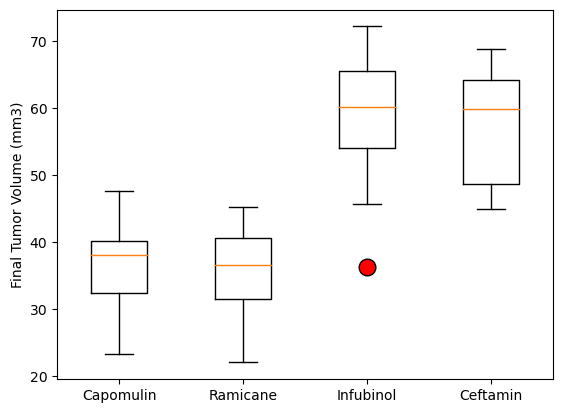

In [80]:
# Create a box plot and format the outlier
plt.boxplot(tumor_volume_data, labels=treatment_names, flierprops=dict(markerfacecolor='red', marker='o',markersize = 12))
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

<Axes: xlabel='Timepoint'>

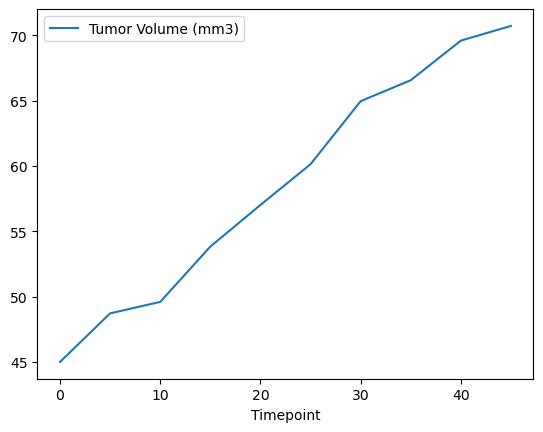

In [63]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
regimen='Capomulin'
mouse_id='a262'
# Specify the data and column names for x and y axes
options=[regimen, mouse_id]
rslt_df = clean_df[clean_df['Mouse ID'].isin(options)]
rslt_df.plot(x="Timepoint",y = "Tumor Volume (mm3)")

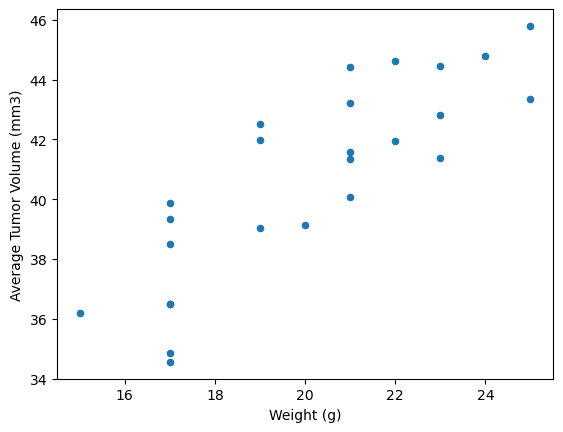

In [85]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

#Filter the data for Drug Regimen == 'Capomulin'
capomulin_df = clean_df.loc[clean_df['Drug Regimen'] == 'Capomulin']
#Groupby MouseID and Calculate Average Tumor Volume and Average Weight
scatter_plot_df = capomulin_df.groupby("Mouse ID")[['Weight (g)','Tumor Volume (mm3)']].mean()

#Create a scatter plot
scatter_plot_df.plot('Weight (g)','Tumor Volume (mm3)',kind = "scatter")

# Add labels and title
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

The correlation is: 0.8419363424694721


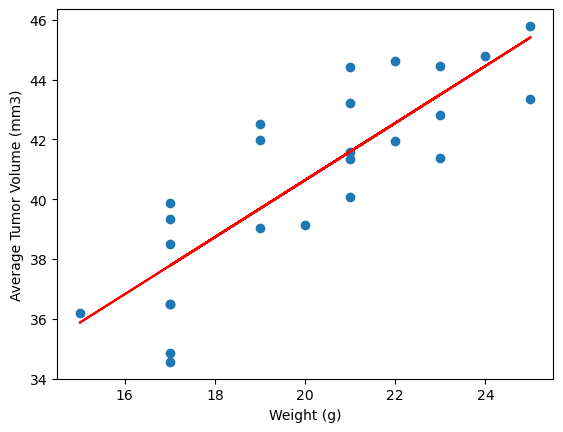

In [71]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

#Assign x and y values
x_values = scatter_plot_df['Weight (g)']
y_values = scatter_plot_df['Tumor Volume (mm3)']

#Initialize the linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Create Scatter Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")

# Add labels and title
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
print(f"The correlation is: {rvalue}")
plt.show()